
#**Integrated Smart Manufacturing Data Analysis**
This notebook provides detailed **EDA and descriptive statistics** for five datasets:
- `logistics.csv`
- `inventory.csv`
- `production.csv`
- `maintenance.csv`
- `quality_control.csv`

It also includes an **overall summary** and **cross-dataset insights** (daily machine-level aggregates).


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

def missing_report(df):
    m = df.isnull().sum()
    return pd.DataFrame({'missing': m, 'pct_missing': (m/len(df))*100}).sort_values('pct_missing', ascending=False)

def corrplot(df, title='Correlation Matrix'):
    c = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(c.values, aspect='auto')
    ax.set_xticks(range(len(c.columns)))
    ax.set_xticklabels(c.columns, rotation=45, ha='right')
    ax.set_yticks(range(len(c.index)))
    ax.set_yticklabels(c.index)
    for i in range(len(c.index)):
        for j in range(len(c.columns)):
            ax.text(j, i, f"{c.values[i,j]:.2f}", ha='center', va='center', fontsize=8)
    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

def histgrid(df, cols, bins=30, title='Distributions'):
    n = len(cols)
    for col in cols:
        plt.figure()
        df[col].hist(bins=bins, edgecolor='black')
        plt.title(f'{title}: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


## Load Datasets

In [ ]:

logistics = pd.read_csv('logistics.csv')
inventory = pd.read_csv('inventory.csv')
production = pd.read_csv('production.csv')
maintenance = pd.read_csv('maintenance.csv')
quality = pd.read_csv('quality_control.csv')

# Brief shapes
summary_shapes = pd.DataFrame({
    'dataset': ['logistics','inventory','production','maintenance','quality_control'],
    'rows': [len(logistics), len(inventory), len(production), len(maintenance), len(quality)],
    'cols': [logistics.shape[1], inventory.shape[1], production.shape[1], maintenance.shape[1], quality.shape[1]]
})
summary_shapes


,dataset,rows,cols
0,logistics,100000,13
1,inventory,10000,9
2,production,2460,14
3,maintenance,1430,10
4,quality_control,10000,7


## Logistics — Descriptive Statistics & EDA

In [ ]:

display(logistics.head())
display(logistics.describe(include='all').T)
missing_report(logistics)


,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,100000,100000,2025-03-11 10:23:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
machine_id,100000.0,NaN,NaN,NaN,25.49933,14.389439,1.0,13.0,25.0,38.0,50.0
temperature,100000.0,NaN,NaN,NaN,75.015625,10.031884,35.55,68.2675,75.06,81.75,121.94
vibration,100000.0,NaN,NaN,NaN,50.01227,14.985444,-17.09,39.97,49.96,60.1,113.8
humidity,100000.0,NaN,NaN,NaN,54.995401,14.43796,30.0,42.52,54.98,67.5,80.0
pressure,100000.0,NaN,NaN,NaN,3.000405,1.152399,1.0,2.0,3.01,4.0,5.0
energy_consumption,100000.0,NaN,NaN,NaN,2.747064,1.297865,0.5,1.63,2.74,3.87,5.0
machine_status,100000.0,NaN,NaN,NaN,1.00205,0.446193,0.0,1.0,1.0,1.0,2.0
anomaly_flag,100000.0,NaN,NaN,NaN,0.08916,0.284976,0.0,0.0,0.0,0.0,1.0
predicted_remaining_life,100000.0,NaN,NaN,NaN,234.26916,150.063062,1.0,97.0,230.0,365.0,499.0


,missing,pct_missing
timestamp,0,0.0
machine_id,0,0.0
temperature,0,0.0
vibration,0,0.0
humidity,0,0.0
pressure,0,0.0
energy_consumption,0,0.0
machine_status,0,0.0
anomaly_flag,0,0.0
predicted_remaining_life,0,0.0


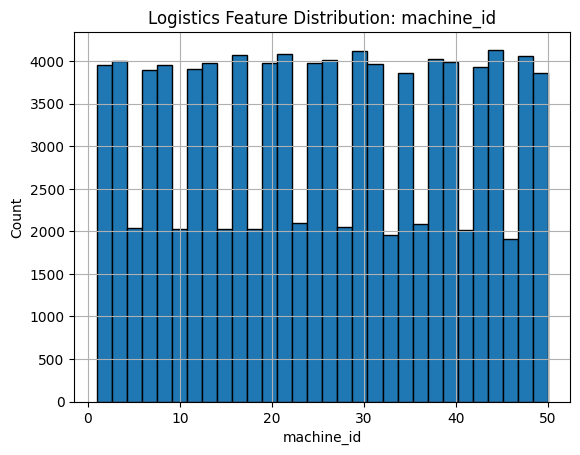

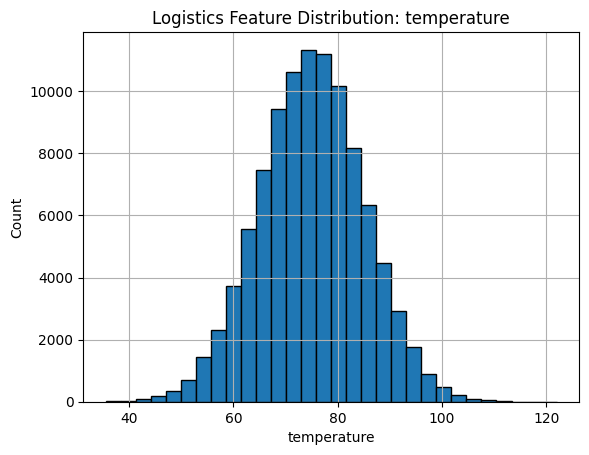

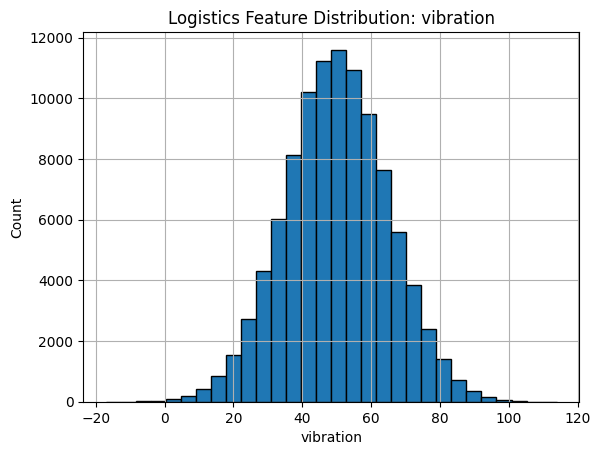

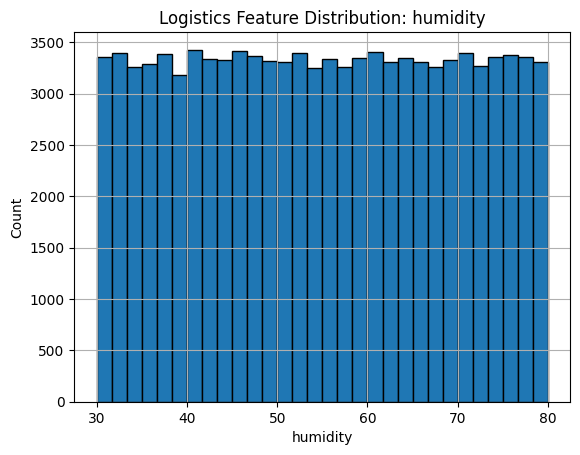

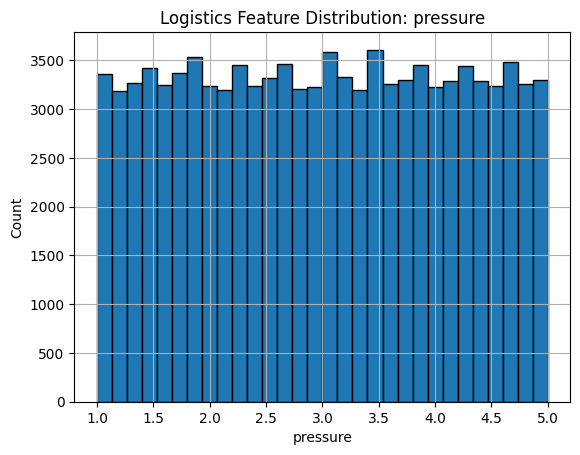

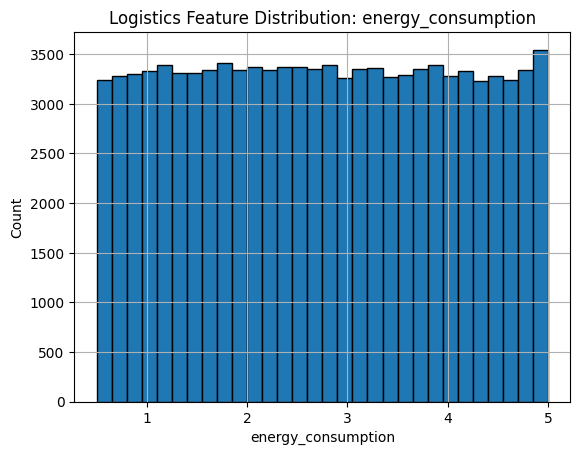

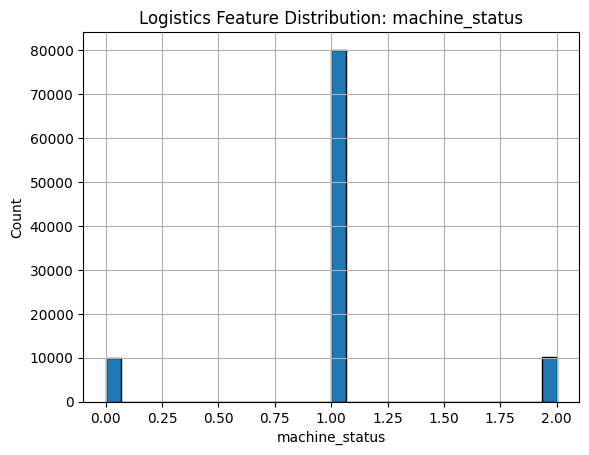

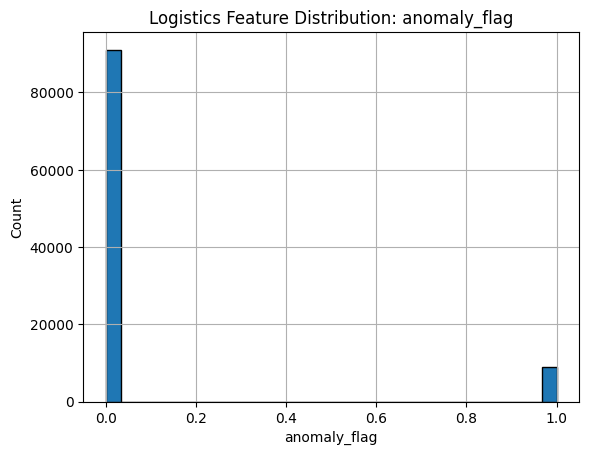

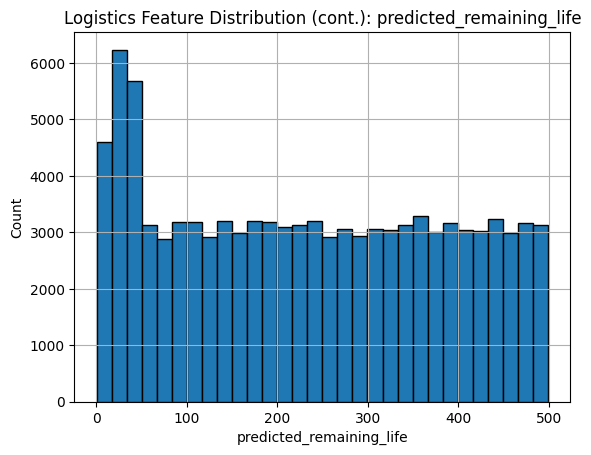

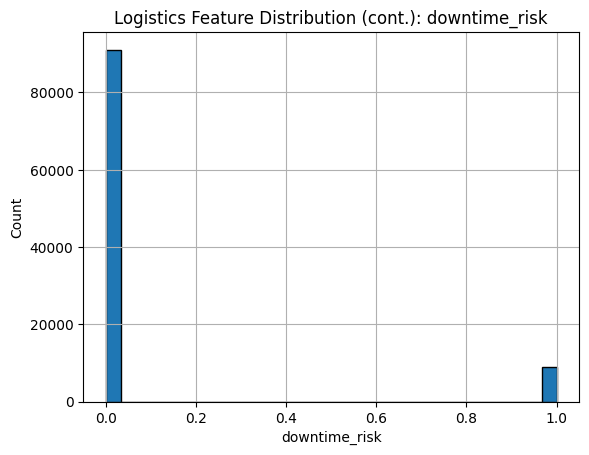

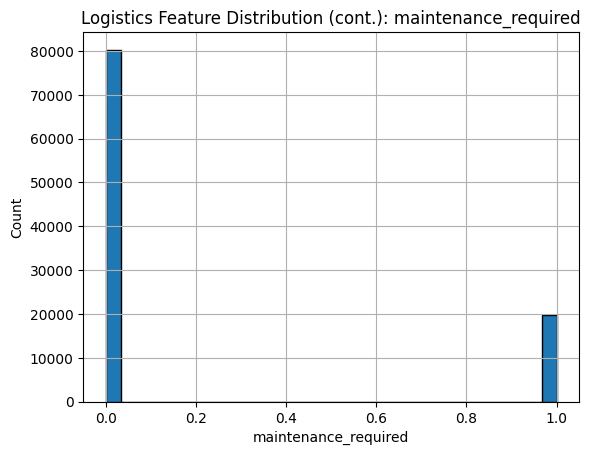

In [ ]:

# Logistics numeric distributions (auto-detect numeric columns)
log_num = logistics.select_dtypes(include=[np.number]).columns.tolist()
histgrid(logistics, log_num[:8], title='Logistics Feature Distribution')  # show first 8 to keep it readable
if len(log_num) > 8:
    histgrid(logistics, log_num[8:], title='Logistics Feature Distribution (cont.)')


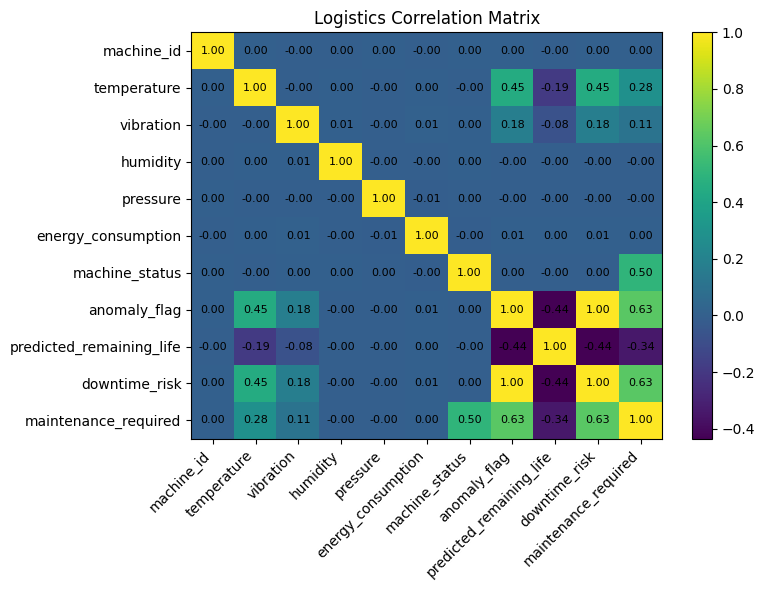

In [ ]:

corrplot(logistics, title='Logistics Correlation Matrix')


## Inventory — Descriptive Statistics & EDA

In [ ]:

display(inventory.head())
display(inventory.describe(include='all').T)
missing_report(inventory)


,Timestamp,Machine ID,Material Category,Material Name,Quantity Used (kg),Recycled Material (%),Energy Consumption (kWh),Production Output (Units),Defect Rate (%)
0,5/1/2025 8:00,M002,Raw Material,Polypropylene,86.73,0.0,96.74,204,3.38
1,5/1/2025 8:05,M009,Raw Material,Cotton,54.77,0.0,91.24,338,2.53
2,5/1/2025 8:10,M001,Hazardous Material,Lead-Based Alloy,157.40,0.0,164.16,529,1.10
3,5/1/2025 8:15,M010,Process Additive,Industrial Oil,163.82,0.0,99.16,532,1.70
4,5/1/2025 8:20,M003,Intermediate Material,Plastic Resin,65.33,0.0,125.59,467,4.24


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,10000,10000,6/4/2025 23:55,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Machine ID,10000,10,M007,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material Category,10000,6,Raw Material,1758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material Name,10000,17,Solvent,854,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Used (kg),10000.0,NaN,NaN,NaN,124.534008,43.136723,50.01,87.215,124.25,161.7525,200.0
Recycled Material (%),10000.0,NaN,NaN,NaN,4.060385,10.908877,0.0,0.0,0.0,0.0,49.96
Energy Consumption (kWh),10000.0,NaN,NaN,NaN,140.111901,34.540921,80.01,110.6475,140.315,169.8775,200.0
Production Output (Units),10000.0,NaN,NaN,NaN,553.4815,260.877808,100.0,327.0,554.0,780.0,1000.0
Defect Rate (%),10000.0,NaN,NaN,NaN,2.526966,1.442364,0.0,1.29,2.54,3.78,5.0


,missing,pct_missing
Timestamp,0,0.0
Machine ID,0,0.0
Material Category,0,0.0
Material Name,0,0.0
Quantity Used (kg),0,0.0
Recycled Material (%),0,0.0
Energy Consumption (kWh),0,0.0
Production Output (Units),0,0.0
Defect Rate (%),0,0.0


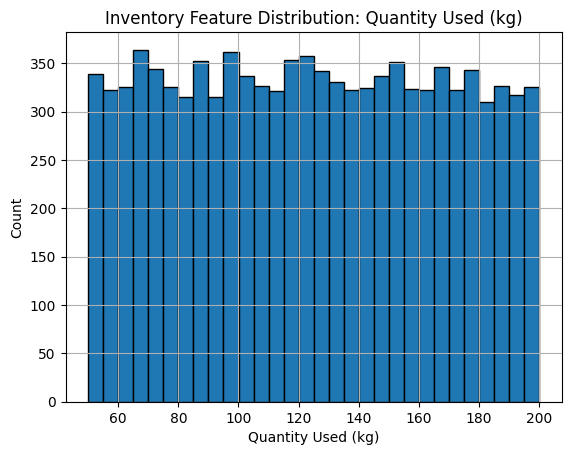

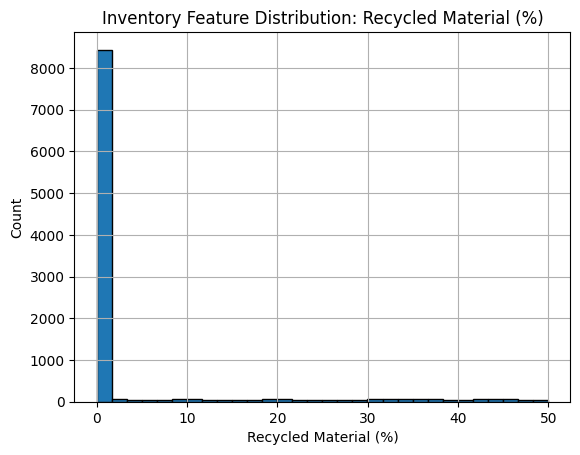

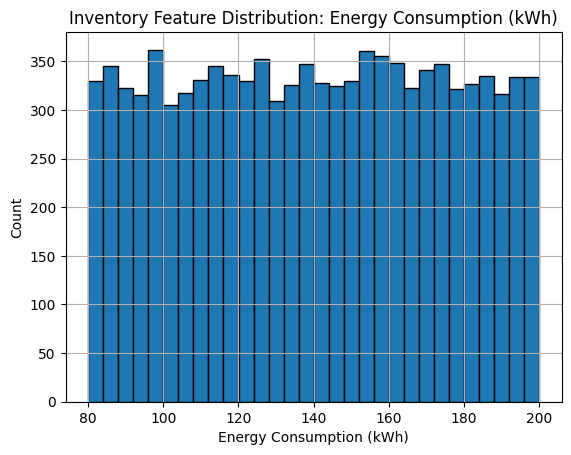

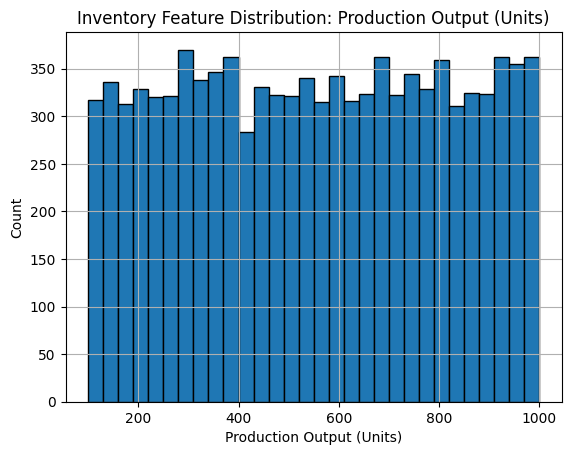

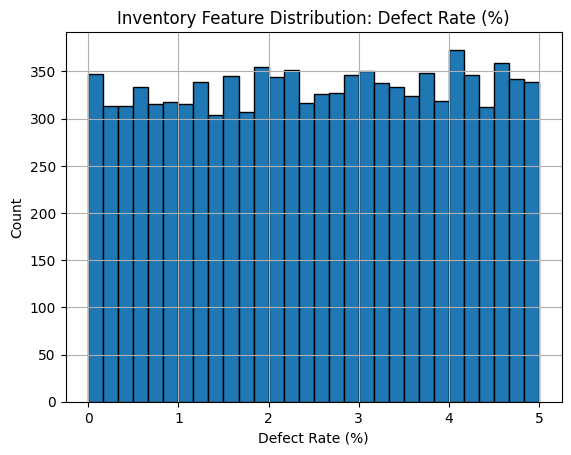

In [ ]:

inv_num = inventory.select_dtypes(include=[np.number]).columns.tolist()
histgrid(inventory, inv_num, title='Inventory Feature Distribution')


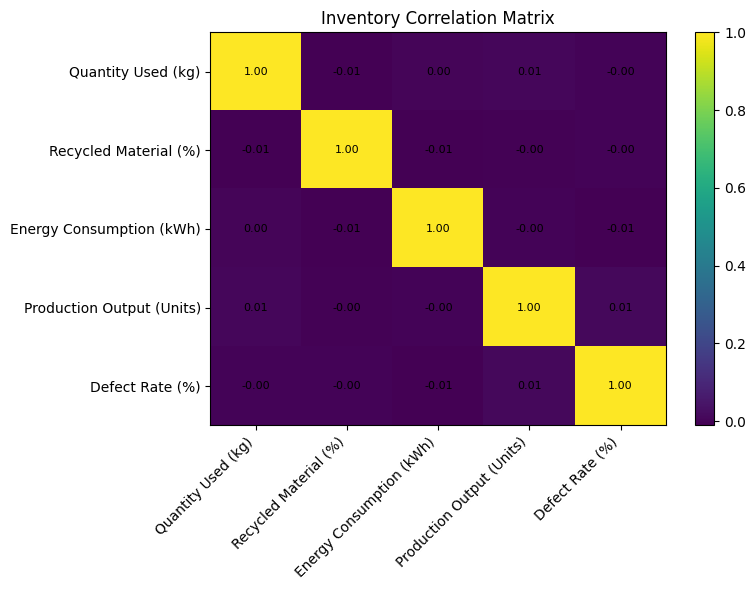

In [ ]:

corrplot(inventory, title='Inventory Correlation Matrix')


## Production — Descriptive Statistics & EDA

In [ ]:

display(production.head())
display(production.describe(include='all').T)
missing_report(production)


,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,production_status
0,2025-03-10 08:00:00,M003,Welder,78.302879,2.043751,23.059855,5.088076,20.011026,118.146510,0.883246,0,0,11.675410,0
1,2025-03-10 08:01:00,M004,Conveyor,80.877076,2.175590,16.012814,5.412956,18.375739,123.062058,0.777073,38,0,3.292706,0
2,2025-03-10 08:02:00,M001,Drill,71.315418,2.154465,15.759164,5.769405,17.112107,122.754064,0.757374,37,0,5.762582,0
3,2025-03-10 08:03:00,M003,Conveyor,76.496198,2.245978,16.490268,4.618784,21.090684,118.990270,0.796481,39,0,0.851911,0
4,2025-03-10 08:04:00,M003,CNC,73.612202,2.097302,18.064286,5.431250,20.868592,113.749872,0.813361,0,0,18.663902,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,2460,2460,2025-03-12 00:59:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
machine_id,2460,4,M001,647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
machine_type,2460,4,Welder,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,2411.0,NaN,NaN,NaN,77.938602,3.944714,66.136665,75.240313,77.734034,80.165885,94.569177
vibration_level,2404.0,NaN,NaN,NaN,2.230957,1.117706,1.048872,1.806224,2.005956,2.230489,9.109769
power_consumption,2405.0,NaN,NaN,NaN,18.422577,2.669908,10.326689,16.741559,18.159299,19.699169,34.36841
pressure,2460.0,NaN,NaN,NaN,4.993933,0.391494,3.43104,4.732438,4.992426,5.251234,6.351107
material_flow_rate,2460.0,NaN,NaN,NaN,20.032925,1.511022,15.376157,19.017601,20.031692,21.050319,25.143366
cycle_time,2460.0,NaN,NaN,NaN,120.071115,5.057995,101.823999,116.624522,120.08957,123.567379,142.395421
error_rate,2460.0,NaN,NaN,NaN,0.794854,0.085257,0.540933,0.735993,0.789355,0.842145,1.0


,missing,pct_missing
vibration_level,56,2.276423
power_consumption,55,2.235772
temperature,49,1.991870
timestamp,0,0.000000
machine_id,0,0.000000
machine_type,0,0.000000
pressure,0,0.000000
material_flow_rate,0,0.000000
cycle_time,0,0.000000
error_rate,0,0.000000


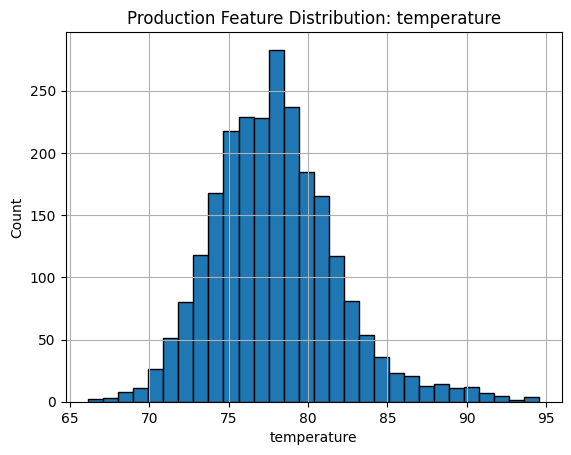

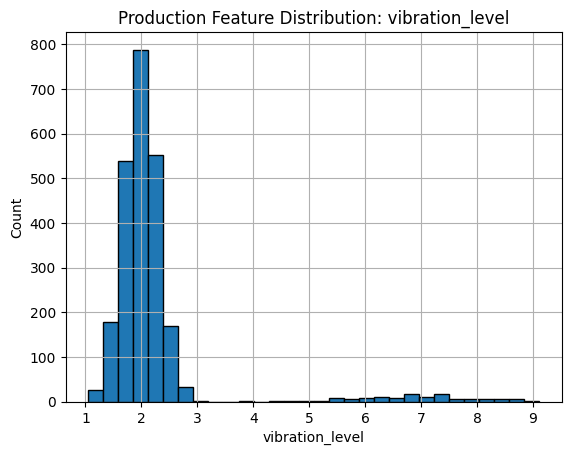

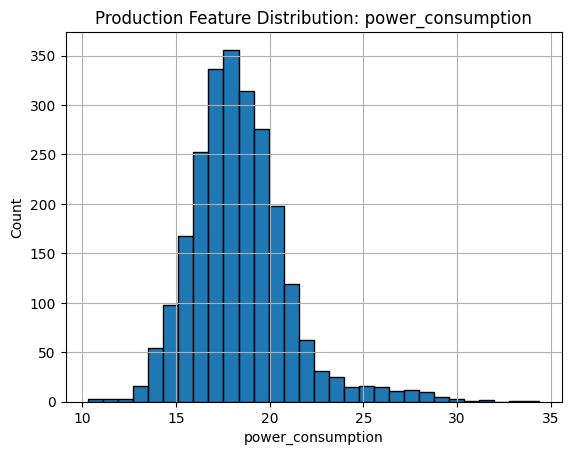

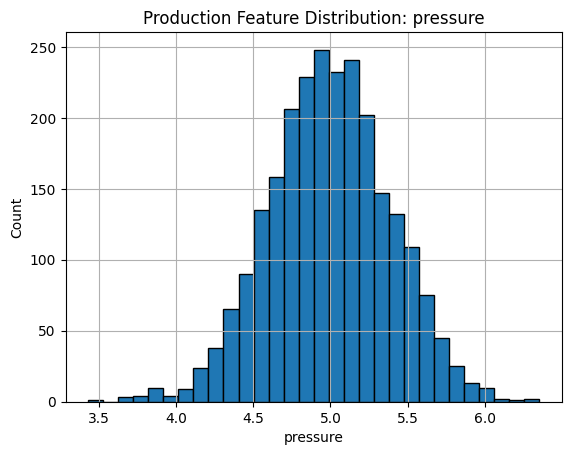

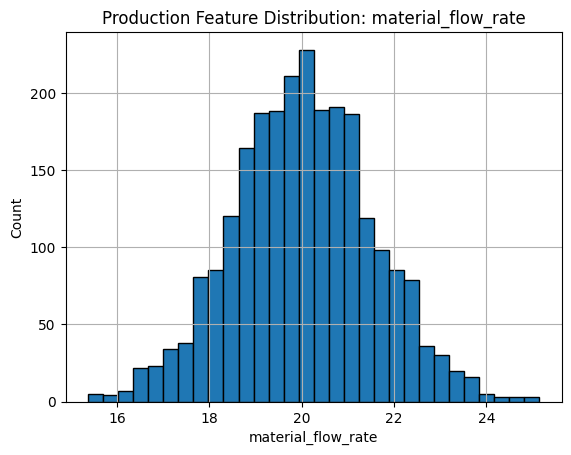

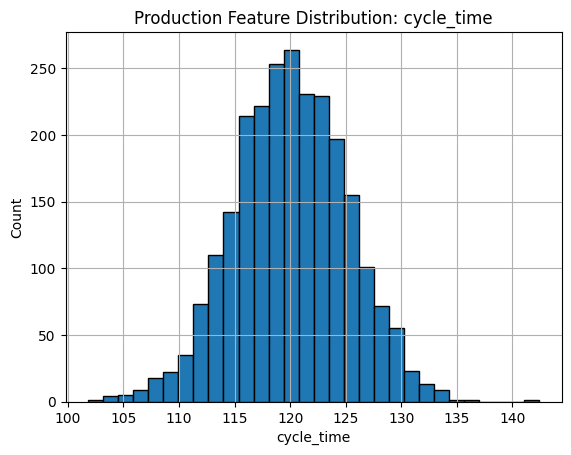

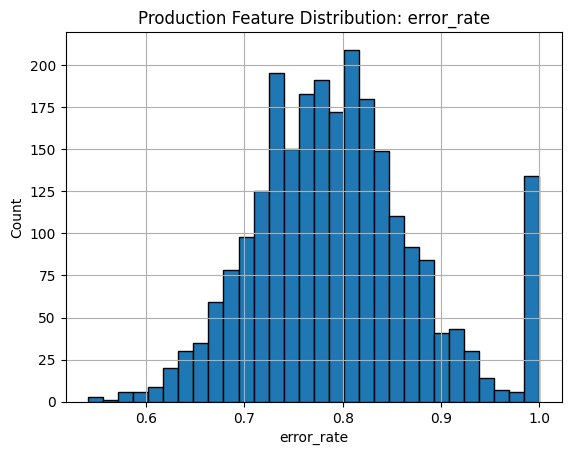

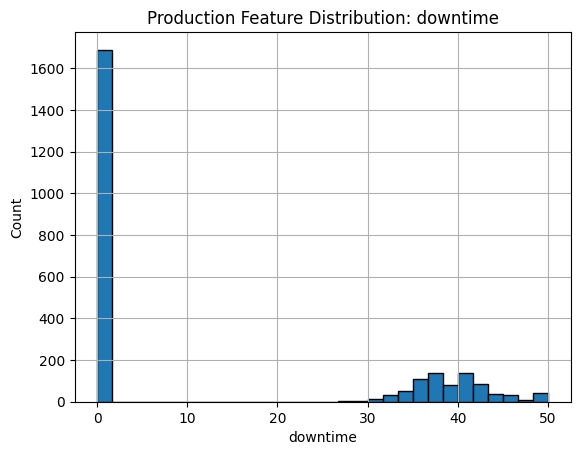

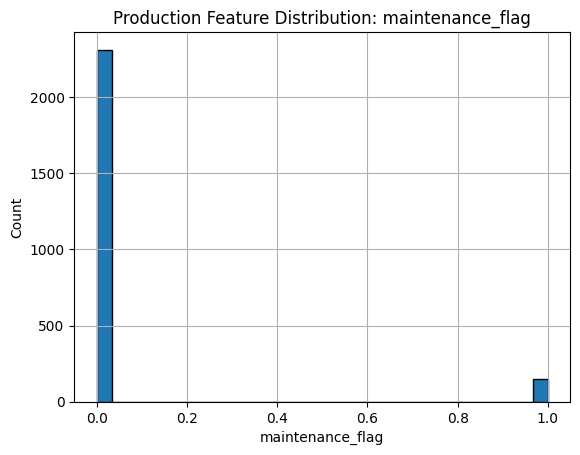

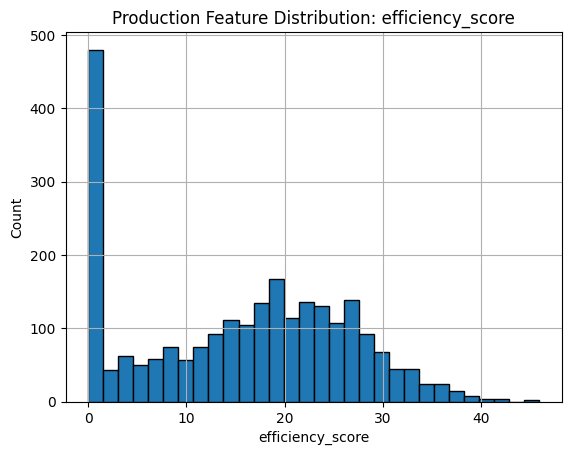

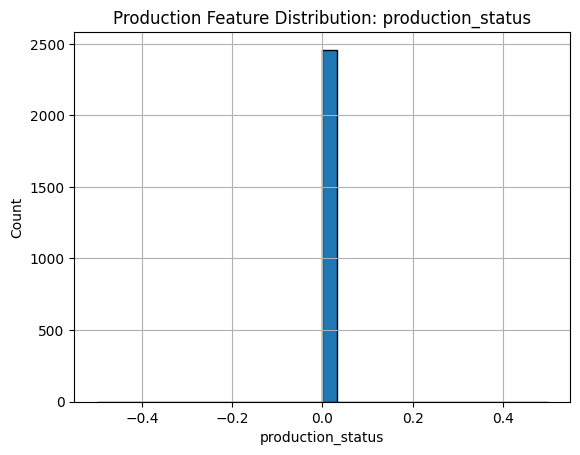

In [ ]:

prod_num = production.select_dtypes(include=[np.number]).columns.tolist()
histgrid(production, prod_num, title='Production Feature Distribution')


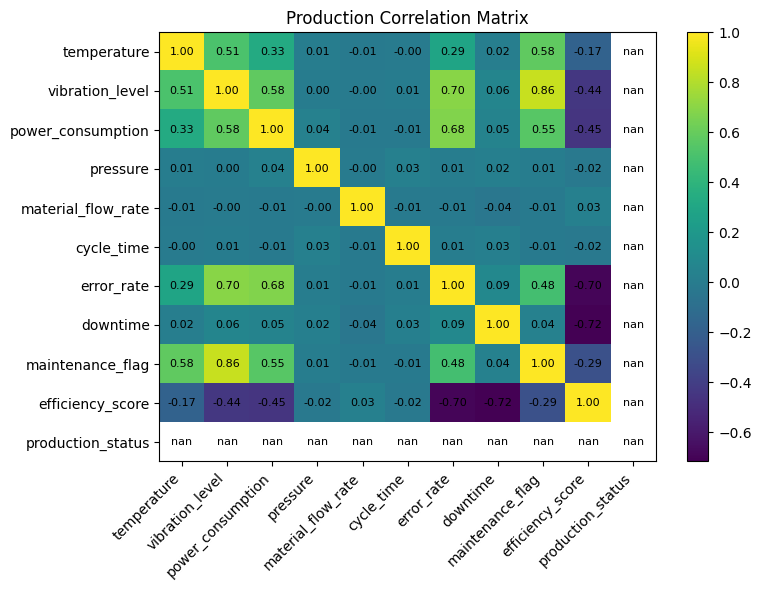

In [ ]:

corrplot(production, title='Production Correlation Matrix')


## Maintenance — Descriptive Statistics & EDA

In [ ]:

display(maintenance.head())
display(maintenance.describe(include='all').T)
missing_report(maintenance)


,Machine_ID,Temp_C,Vibration_mm_s,Pressure_Bar,Acoustic_dB,Inspection_Duration_min,Downtime_Cost_USD,Technician_Availability_pct,Failure_Prob,Maintenance_Priority
0,M004,70.415631,3.036378,5.582562,74.494678,68,3112,99,0.48,2
1,M006,74.509666,2.787866,4.916866,64.017351,127,522,63,0.50,2
2,M009,78.724957,2.067099,4.597601,68.772382,68,836,84,0.47,2
3,M006,76.677258,1.998635,5.012083,76.909872,142,3799,80,0.48,2
4,M009,53.381545,3.844676,5.176345,84.855886,88,2710,78,0.51,2


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Machine_ID,1430,10,M001,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_C,1430.0,NaN,NaN,NaN,75.45776,9.957299,41.483895,68.811195,75.473914,82.31917,109.958778
Vibration_mm_s,1430.0,NaN,NaN,NaN,2.492967,0.993764,-0.886814,1.79077,2.493069,3.201869,5.420753
Pressure_Bar,1430.0,NaN,NaN,NaN,5.00649,0.493718,3.477036,4.680468,5.000584,5.340422,7.026275
Acoustic_dB,1430.0,NaN,NaN,NaN,70.167973,10.134302,35.330958,63.290407,70.219443,77.099673,97.989795
Inspection_Duration_min,1430.0,NaN,NaN,NaN,89.217483,34.830122,30.0,57.25,89.0,120.0,149.0
Downtime_Cost_USD,1430.0,NaN,NaN,NaN,2718.568531,1296.430507,502.0,1595.0,2681.5,3861.75,4998.0
Technician_Availability_pct,1430.0,NaN,NaN,NaN,74.43007,14.450429,50.0,62.0,74.0,87.0,99.0
Failure_Prob,1430.0,NaN,NaN,NaN,0.491965,0.056898,0.31,0.45,0.49,0.53,0.66
Maintenance_Priority,1430.0,NaN,NaN,NaN,1.836364,0.490433,1.0,2.0,2.0,2.0,3.0


,missing,pct_missing
Machine_ID,0,0.0
Temp_C,0,0.0
Vibration_mm_s,0,0.0
Pressure_Bar,0,0.0
Acoustic_dB,0,0.0
Inspection_Duration_min,0,0.0
Downtime_Cost_USD,0,0.0
Technician_Availability_pct,0,0.0
Failure_Prob,0,0.0
Maintenance_Priority,0,0.0


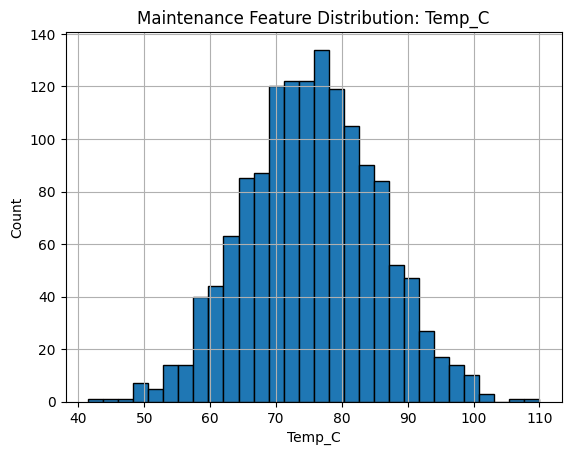

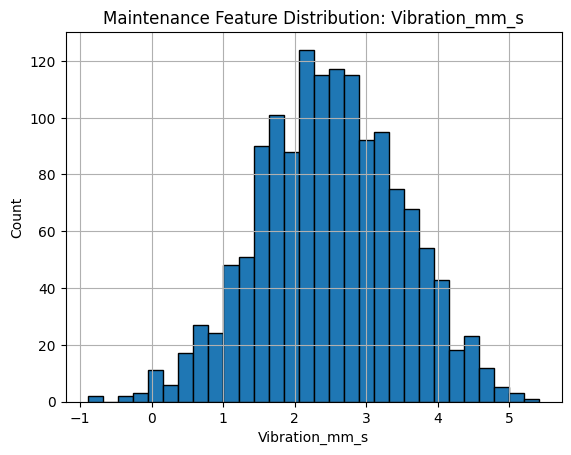

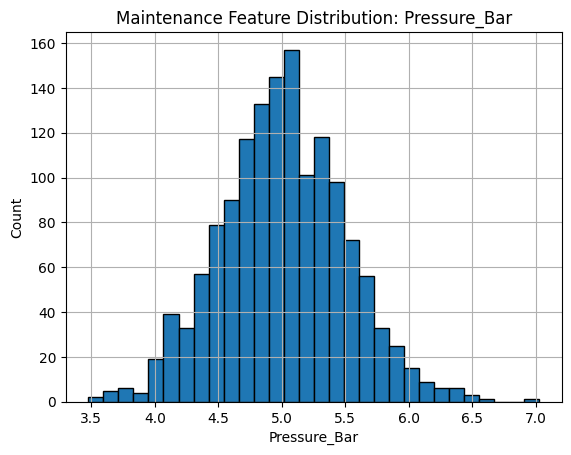

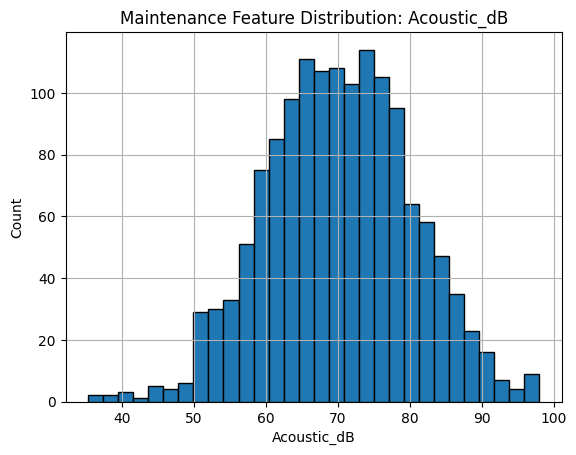

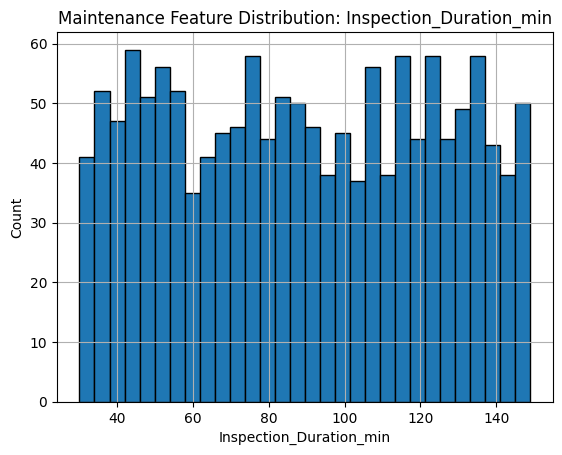

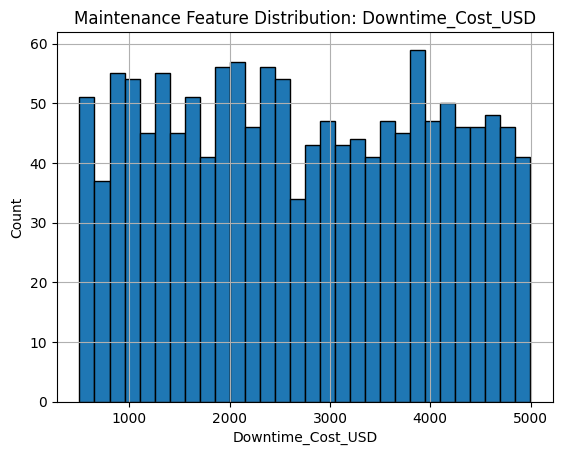

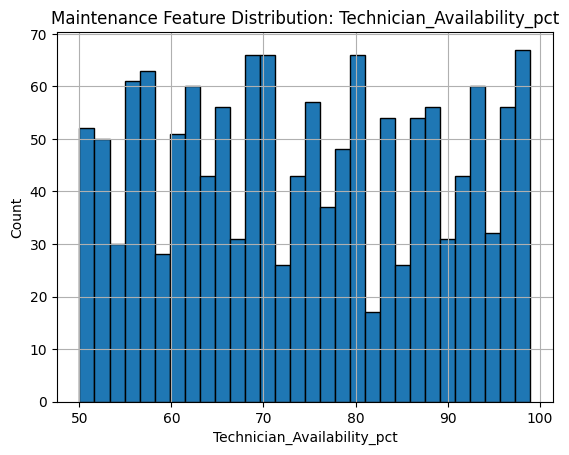

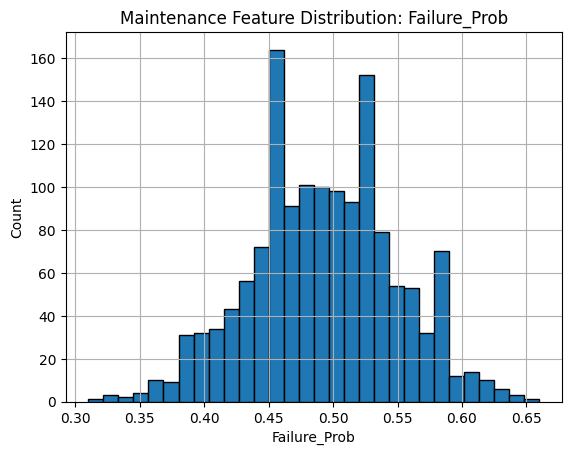

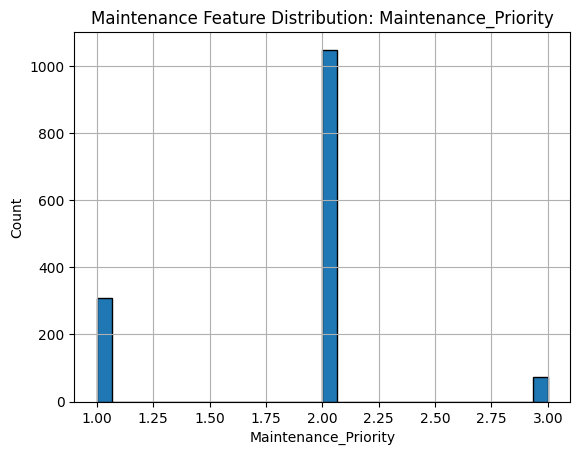

In [ ]:

mnt_num = maintenance.select_dtypes(include=[np.number]).columns.tolist()
histgrid(maintenance, mnt_num, title='Maintenance Feature Distribution')


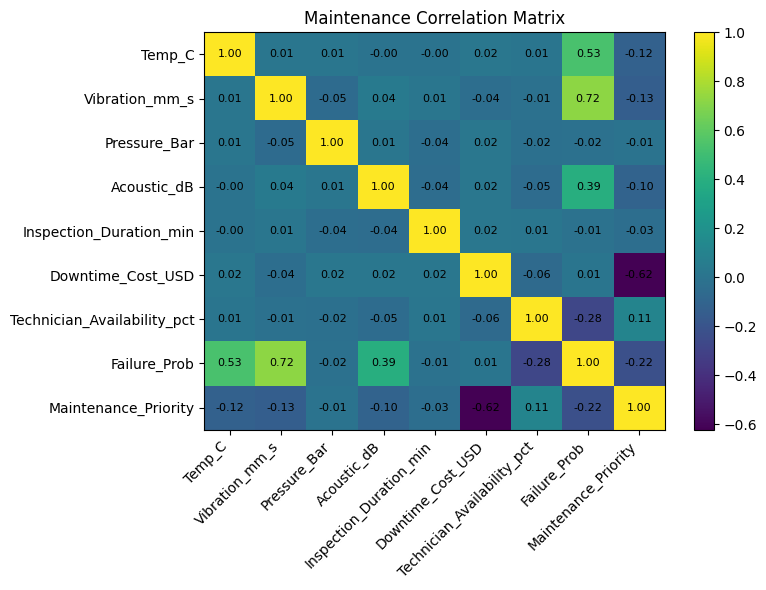

In [ ]:

corrplot(maintenance, title='Maintenance Correlation Matrix')


## Quality Control — Descriptive Statistics & EDA

In [ ]:

display(quality.head())
display(quality.describe(include='all').T)
missing_report(quality)


,Timestamp,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
0,4/1/2025 8:00,78.92,1461,8.49,0.07,1.97,0
1,4/1/2025 8:01,71.83,1549,8.97,0.04,1.01,0
2,4/1/2025 8:02,74.88,1498,8.52,0.08,1.60,0
3,4/1/2025 8:03,77.27,1478,8.28,0.09,1.87,0
4,4/1/2025 8:04,76.50,1524,8.07,0.04,1.53,0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,10000,10000,4/8/2025 6:23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature (°C),10000.0,NaN,NaN,NaN,74.989407,1.985371,67.58,73.66,75.0,76.34,82.47
Machine Speed (RPM),10000.0,NaN,NaN,NaN,1499.5624,29.059738,1450.0,1474.0,1500.0,1525.0,1549.0
Production Quality Score,10000.0,NaN,NaN,NaN,8.500839,0.287774,8.0,8.25,8.5,8.75,9.0
Vibration Level (mm/s),10000.0,NaN,NaN,NaN,0.065218,0.020607,0.03,0.05,0.07,0.08,0.1
Energy Consumption (kWh),10000.0,NaN,NaN,NaN,1.499053,0.288139,1.0,1.25,1.5,1.75,2.0
Optimal Conditions,10000.0,NaN,NaN,NaN,0.0966,0.295427,0.0,0.0,0.0,0.0,1.0


,missing,pct_missing
Timestamp,0,0.0
Temperature (°C),0,0.0
Machine Speed (RPM),0,0.0
Production Quality Score,0,0.0
Vibration Level (mm/s),0,0.0
Energy Consumption (kWh),0,0.0
Optimal Conditions,0,0.0


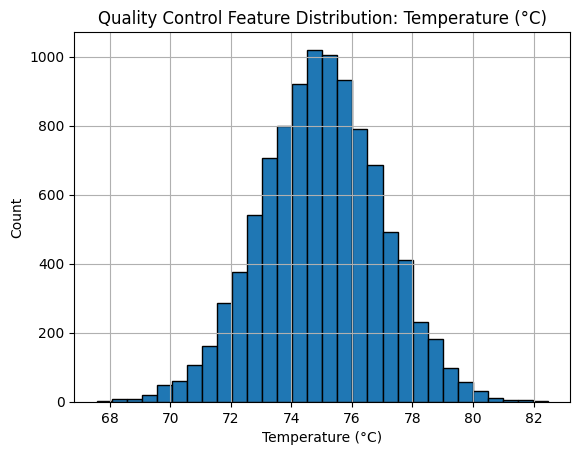

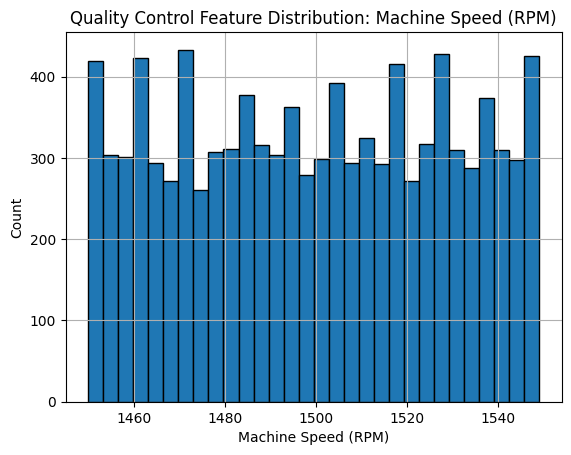

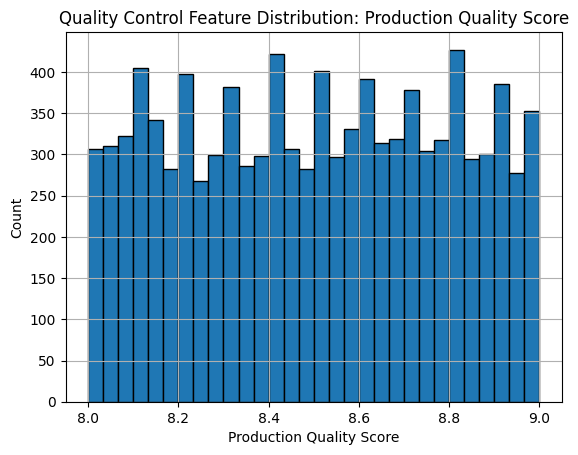

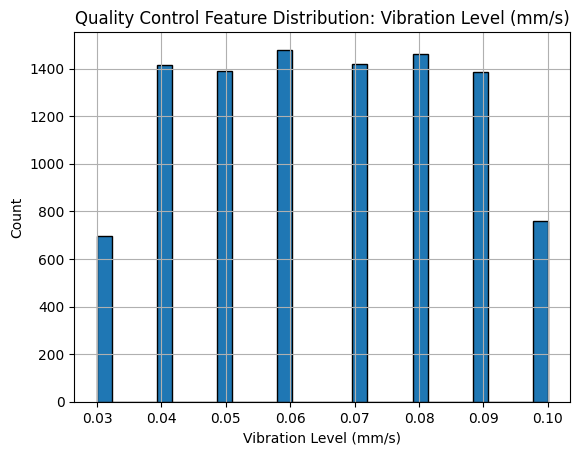

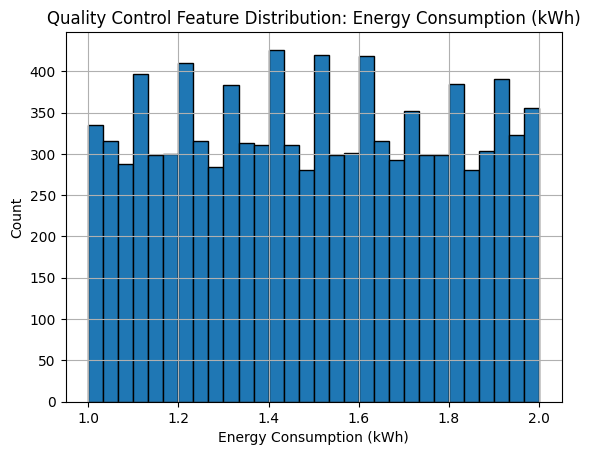

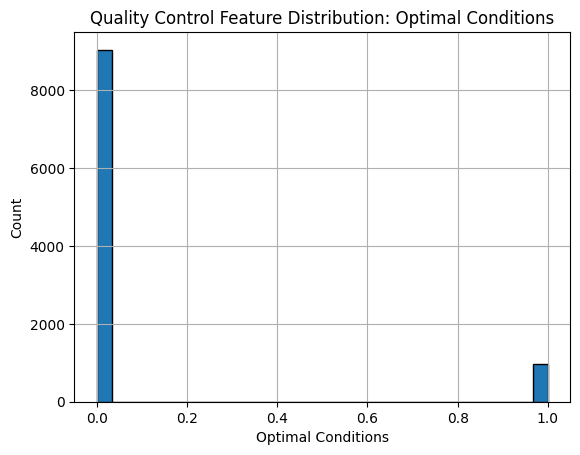

In [ ]:

qc_num = quality.select_dtypes(include=[np.number]).columns.tolist()
histgrid(quality, qc_num, title='Quality Control Feature Distribution')


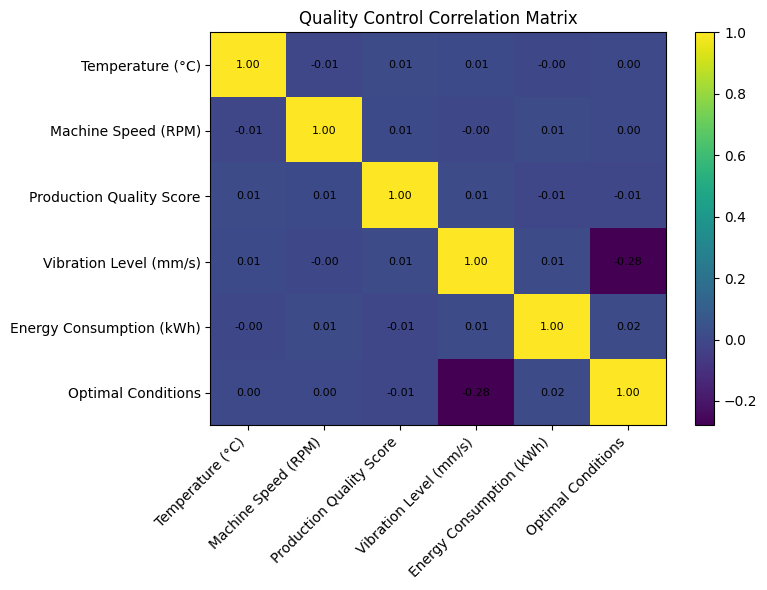

In [ ]:

corrplot(quality, title='Quality Control Correlation Matrix')


## Cross‑Dataset Overview (Daily Machine Aggregates)

In [ ]:

# Normalize keys
def norm_cols(df, ts_candidates, machine_candidates):
    d = df.copy()
    ts_col = None
    for c in ts_candidates:
        if c in d.columns:
            ts_col = c; break
    if ts_col is not None:
        d['__ts'] = pd.to_datetime(d[ts_col], errors='coerce')
        d['__date'] = d['__ts'].dt.date
    else:
        d['__ts'] = pd.NaT
        d['__date'] = pd.NaT

    m_col = None
    for c in machine_candidates:
        if c in d.columns:
            m_col = c; break
    if m_col is not None:
        d['__machine'] = d[m_col].astype(str)
    else:
        d['__machine'] = np.nan
    return d

log_n = norm_cols(logistics, ['timestamp','Timestamp'], ['machine_id','Machine ID'])
inv_n = norm_cols(inventory, ['Timestamp','timestamp'], ['Machine ID','machine_id'])
prod_n = norm_cols(production, ['timestamp','Timestamp'], ['machine_id','Machine ID'])
mnt_n = norm_cols(maintenance, ['timestamp','Timestamp'], ['Machine_ID','machine_id'])
qc_n  = norm_cols(quality, ['Timestamp','timestamp'], ['Machine ID','machine_id'])

# Daily machine aggregates where both keys exist
def daily_machine_agg(df):
    has_date = df['__date'].notna().all() == False or df['__date'].notna().any()
    has_machine = df['__machine'].notna().any()
    if has_date and has_machine:
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        grp = df.groupby(['__date','__machine'])[num_cols].mean().reset_index()
        return grp
    return pd.DataFrame()

log_dm  = daily_machine_agg(log_n)
inv_dm  = daily_machine_agg(inv_n)
prod_dm = daily_machine_agg(prod_n)
# maintenance has no timestamp; aggregate by machine only
mnt_m = maintenance.copy()
mnt_m['__machine'] = (maintenance['Machine_ID'] if 'Machine_ID' in maintenance.columns else maintenance.get('machine_id','')).astype(str)
mnt_ag = mnt_m.groupby('__machine')[mnt_m.select_dtypes(include=[np.number]).columns].mean().reset_index()

# Join daily aggregates on date+machine for L/I/P; then left join maintenance stats on machine
from functools import reduce
dfs = [df for df in [log_dm, inv_dm, prod_dm] if not df.empty]
if dfs:
    merged = reduce(lambda l,r: pd.merge(l, r, on=['__date','__machine'], how='inner', suffixes=('','_r')), dfs)
    merged = pd.merge(merged, mnt_ag, on='__machine', how='left', suffixes=('','_mnt'))
    # Keep a compact sample to preview
    merged_sample = merged.head(10)
else:
    merged = pd.DataFrame()
    merged_sample = merged

display(merged_sample)
print(f"Merged rows (daily machine-level): {len(merged)}")


,__date,__machine,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,downtime_risk,maintenance_required,Quantity Used (kg),Recycled Material (%),Energy Consumption (kWh),Production Output (Units),Defect Rate (%),temperature_r,vibration_level,power_consumption,pressure_r,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,production_status,Temp_C,Vibration_mm_s,Pressure_Bar,Acoustic_dB,Inspection_Duration_min,Downtime_Cost_USD,Technician_Availability_pct,Failure_Prob,Maintenance_Priority


Merged rows (daily machine-level): 0


In [ ]:

if not merged.empty:
    # Compute correlations on numeric columns
    corrplot(merged, title='Cross‑Dataset Correlation (Daily Machine Aggregates)')
else:
    print('Not enough common keys to build a merged daily machine-level dataset.')


Not enough common keys to build a merged daily machine-level dataset.



## 🧠 Overall Summary & Key Findings
- **Logistics**: Use sensor and lifecycle features to anticipate anomalies and maintenance windows, smoothing material flow.
- **Inventory**: Strong signal for sustainability and yield via recycled material %, defect rates, and energy per unit.
- **Production**: Cycle time, vibration, and power consumption explain much of efficiency variance.
- **Maintenance**: Priority, failure probability, and downtime cost guide spare parts and technician scheduling.
- **Quality Control**: Quality scores are stable; relate temperature and vibration to find optimal operating bands.

**Cross‑dataset view** (daily machine-level aggregates) helps connect:
- upstream **logistics/inventory** conditions → **production efficiency**, and
- **maintenance** posture → reduced **downtime** and improved **quality**.

Use the merged table to build ML models for **efficiency_score**, **downtime**, or **quality** using predictors from logistics/inventory and maintenance averages.
